יבאו את הספריות

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

הריצו קוד ליצירת נתוני XOR 

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# יצירת נתונים עם ארבע קבוצות (דמוי XOR)
X, y = make_blobs(n_samples=400, centers=[(-1, -1), (1, 1), (1, -1), (-1, 1)], 
                  cluster_std=0.3, random_state=42)

# שינוי התוויות כדי לדמות XOR (מחלקות חלופיות)
y = np.array([0 if label in [0, 1] else 1 for label in y])

הציגו את הנתונים השונים בעזרת  Scatter plot

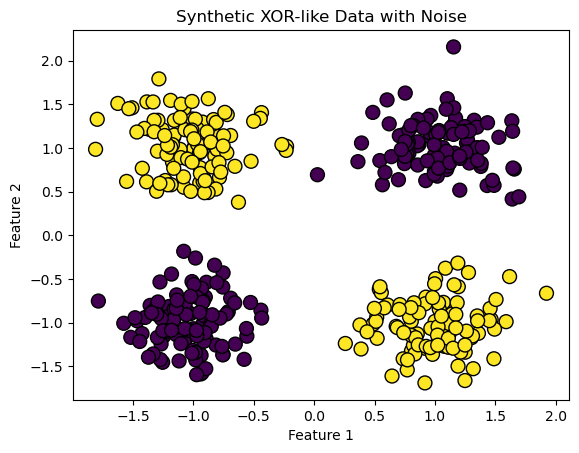

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title("Synthetic XOR-like Data with Noise")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

בניית המודל

In [4]:
# Make Test/Train Split

# Convert Dataset to PyTorch Tensors 
#ליצר טנסור
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1,1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1,1)
# Define Neural Network Architecture
#Create  a subclass to nn.Module

class XORModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Define layers
        self.fc1 = nn.Linear(2, 8)   # Hidden layer with 8 neurons
        self.relu1 = nn.ReLU()         # Activation function
        self.fc2 = nn.Linear(8, 1)    # Output layer
       

    def forward(self, x):
        x= self.fc1(x)
        x= self.relu1(x)
        x= self.fc2(x)
        # לא צריך שיכבת סיגמואיד בגלל העלות שבחרנו
        return x

model = XORModel()

# Instantiate model, loss function, and optimizer
criterion = nn.BCEWithLogitsLoss()  # Binary cross entropy with logits
optimizer = optim.Adam(model.parameters(), lr=0.01)


epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [1/1000], Loss: 0.7435
Epoch [101/1000], Loss: 0.1933
Epoch [201/1000], Loss: 0.0613
Epoch [301/1000], Loss: 0.0333
Epoch [401/1000], Loss: 0.0214
Epoch [501/1000], Loss: 0.0151
Epoch [601/1000], Loss: 0.0113
Epoch [701/1000], Loss: 0.0089
Epoch [801/1000], Loss: 0.0072
Epoch [901/1000], Loss: 0.0059


In [5]:
# Step 4: Evaluation
model.eval()
with torch.no_grad():
    predictions = torch.sigmoid(model(X_test_tensor))
    predicted = (predictions > 0.5).float()
    accuracy = (predicted ==y_test_tensor).float().mean().item()


    print(f"Accuracy: {accuracy * 100:.2f}%")

   

Accuracy: 100.00%


You can  download `PlotBoudary.ipynb` and use
```python 
%run /content/PlotBoudary.ipynb
```
to create Plot the funtion `plot_boundary` expects X,y and the model name

C:\Users\USER\anaconda3\envs\env23\Lib\site-packages\torch\functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3596.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


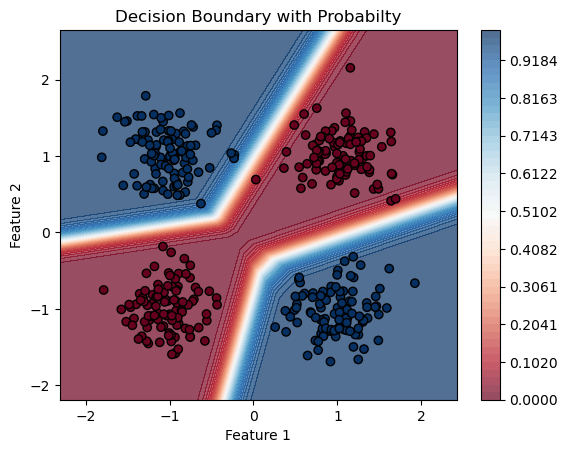

In [6]:
%run PlotBoudary.ipynb
plot_boundary(X,y,model)